In [1]:
# -*- coding: utf-8 -*-
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as st

import numpy as np
np.random.seed(1555)
from keras.models import Sequential,load_model,Model
from keras.layers import Dense,Reshape,Dropout,MaxoutDense
from keras.layers.advanced_activations import LeakyReLU,PReLU,SReLU
from keras.regularizers import l1,l2
from keras.constraints import nonneg
# from keras.callbacks import EarlyStopping
# earlyStopping=EarlyStopping(monitor='val_loss', patience=0, verbose=0, mode='auto')

import math
import time
import datetime

import sklearn.linear_model as lm
from sklearn import cluster, datasets, metrics
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

Using TensorFlow backend.


In [4]:
oli = pd.read_csv('cleanoutwvd.csv')
olier = oli.copy();
olier=olier.drop(['YY','day','date','time','direct','lane','eqflow','fakeornot','realvd'],axis=1);

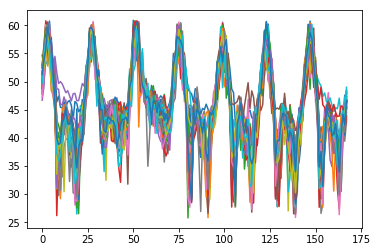

In [6]:
i=3

olieri=olier[olier.sortby==i]
for x in range(0,len(olieri),168):
    plt.plot(olieri.speed[x:x+168].values)

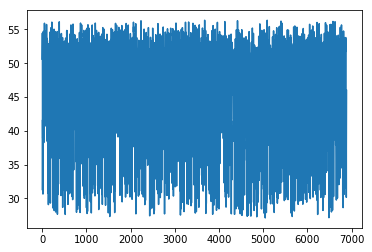

In [107]:
i=4

olieri=olier[olier.sortby==i]
plt.plot(olieri.speed.values)

In [22]:

sp45=olieri.speed.quantile(0.4);sp45
jamparea=olieri.where((olieri.speed<sp45)&(olieri.accu>5)).dropna().copy()

0.501213275801


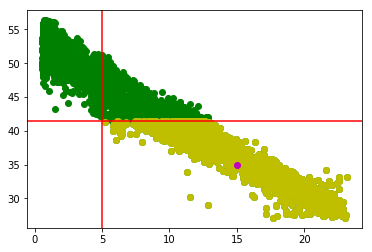

In [111]:
plt.plot(olieri.accu,olieri.speed,'go')
# plt.plot(wwp.accu,wwp.eqflow,'go')
acccu = 15
sppped = 35

plt.plot(jamparea.accu,jamparea.speed,'yo')
plt.axhline(y=sp45, xmin=0, xmax=olieri.accu.count(), color='r')
plt.axvline(5, color='r')
plt.plot(acccu,sppped,'mo')
spmn = olieri.speed.min()
acmx = olieri.accu.max()
why = sp45 - spmn
whx = acmx - 5


xp = acmx - acccu
yp = sppped - spmn


print ((1-(xp/whx))/2)+((1-(yp/why))/2)

In [47]:
i=3
olieri=olier[olier.sortby==i]

thisweek=olieri.reset_index().drop('index',axis=1).ix[6552:6719,:]

thisweekno=StandardScaler().fit(olier).transform(thisweek)
model=load_model('model0309.h5')
nextweek = model.predict(np.array([thisweekno.tolist()]))

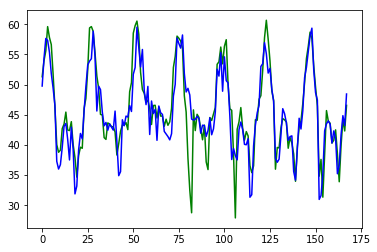

In [48]:
nextweekori=olieri.reset_index().drop('index',axis=1).ix[6720:,:].reset_index()
nextweekp = StandardScaler().fit(olier.speed.values.reshape(-1,1)).inverse_transform(nextweek[0])
plt.plot(nextweekori.speed,color='g')
# plt.plot(nextweekp,color='r')
plt.plot(thisweek.speed.values,color='b')

In [114]:
pre=pd.DataFrame(nextweekp,columns=['speed'])
pre['time']=oli[oli.sortby==3].reset_index().drop('index',axis=1).ix[6552:6719,:].reset_index().time
pre['day'] = oli[oli.sortby==3].reset_index().drop('index',axis=1).ix[6552:6719,:].reset_index().day
pre['jampre']= None


In [115]:


wwp=oli.where(oli.sortby==i).dropna().copy()
print wwp.realvd.unique()[0]
print wwp.direct.unique()[0]
sp45=wwp.speed.quantile(0.4);sp45
wwpcjam=wwp.where((wwp.speed<sp45)&(wwp.accu>5)).dropna().copy()

# i=4;j=8;n=18
# rush = [(i-1,j-1),(i-1,j),(i-1,j+1),(i-1,j+2),(i-1,n-1),(i-1,n),(i-1,n+1),(i-1,n+2)]

for dd,tt in pre[['day','time']].values.tolist():
    alldaynum=wwp[(wwp.day==dd)&(wwp.time==tt)].count()[0]
    jamdaynum=wwpcjam[(wwpcjam.day==dd)&(wwpcjam.time==tt)].count()[0]
    pre.ix[(pre.time==tt)&(pre.day==dd),'jampre']=round((float(jamdaynum)/alldaynum),4);pre
    


# print '星期',int(dd+1),'_',int(tt),'點'
print round((float(jamdaynum)/alldaynum),4)*100,'%'
# ,wwp[(wwp.day==dd)&(wwp.time==tt)].eqflow.mean()


VQ6WK40
3.0
0.0 %


In [119]:
pre['accu'] = oli[oli.sortby==3].reset_index().drop('index',axis=1).ix[6552:6719,:].reset_index().accu;

templist=pre.columns.tolist()
# print templist
prec=pre[templist[1:3]+templist[:1]+templist[-1:]+templist[-2:-1]].copy();prec

prec['cong'] = None;prec
# olierc=olierc[olierclo[:-2]+olierclo[-1:]+olierclo[-2:-1]]

,time,day,speed,accu,jampre,cong
0,0,4,50.835419,2.785000,0,None
1,1,4,54.362923,1.790000,0,None
2,2,4,59.195694,0.970000,0,None
3,3,4,60.017838,0.625000,0,None
4,4,4,58.979218,0.755000,0,None
5,5,4,55.310062,0.750000,0,None
6,6,4,53.422024,1.360000,0,None
7,7,4,47.085384,4.700000,0,None
8,8,4,37.037266,11.530000,0.9268,None
9,9,4,33.054157,13.865000,0.9268,None


In [90]:
templist[0]

'speed'

012345678910111213141516171819
